# Tip amount at airport trips

In [1]:
import setup

In [2]:
def tips_at_airports(month, location_id, direction):
    if direction == 0:
        return month.loc[(month.PULocationID.isin(setup.airports)) & (month['payment_type'] == 1) & (month['passenger_count'] > 0)]['tip_amount'].mean()
    
    elif direction == 1:
        return month.loc[(month.DOLocationID.isin(setup.airports)) & (month['payment_type'] == 1) & (month['passenger_count'] > 0)]['tip_amount'].mean()


def year_average_result(year_average, tips, direction):
    print(f'---------- year average {setup.directions[direction]} airports ----------')
    print(year_average[direction], '\n\n')

    for monthly_index in range(12):
        print(f'---------- {setup.month_labels[monthly_index]} ----------')
        print(tips[monthly_index], '\n')

    print('\n\n')


def show_year_average(year_average):
    fig, ax = setup.plt.subplots(figsize=(10, 10))
    ax.set_title('airport directions - NYC districts')
    ax.pie(year_average, colors=setup.airport_colors, labels=setup.airport_directions, autopct='%1.1f%%', startangle=90)
    setup.plt.show()
    

def show_directional_tips(tips, label):
    fig, ax = setup.plt.subplots(figsize=(20, 10))
    ax.bar(setup.month_labels, tips)
    ax.set_xlabel('months')
    ax.set_ylabel(label)
    setup.plt.show()

# Average over the year

---------- year average from airports ----------
8.078815163950631 


---------- January ----------
8.029526733479797 

---------- February ----------
7.971538556331576 

---------- March ----------
8.135507796113465 

---------- April ----------
8.069091908735205 

---------- May ----------
8.141348151977256 

---------- June ----------
8.15588595996411 

---------- July ----------
7.899332631749372 

---------- August ----------
7.807592796730668 

---------- September ----------
8.091628293685295 

---------- October ----------
8.221741655540717 

---------- November ----------
8.213644400406636 

---------- December ----------
8.208943082693493 




---------- year average to airports ----------
8.583482738074279 


---------- January ----------
8.4883460812467 

---------- February ----------
8.494148764511431 

---------- March ----------
8.662461911232862 

---------- April ----------
8.610422859810086 

---------- May ----------
8.656076400511964 

---------- June ----------
8.

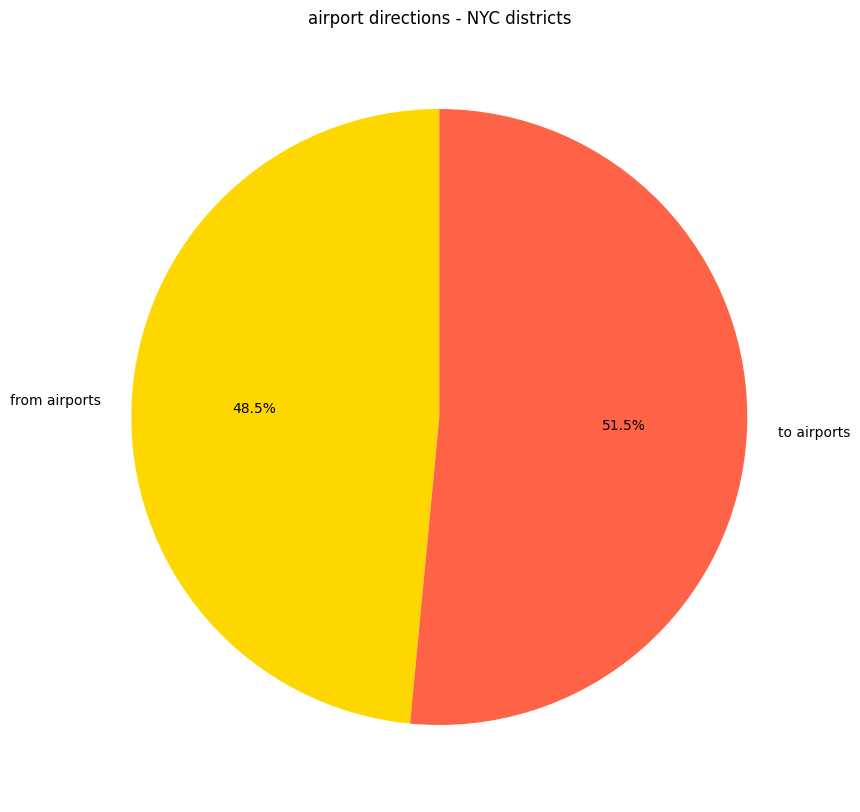

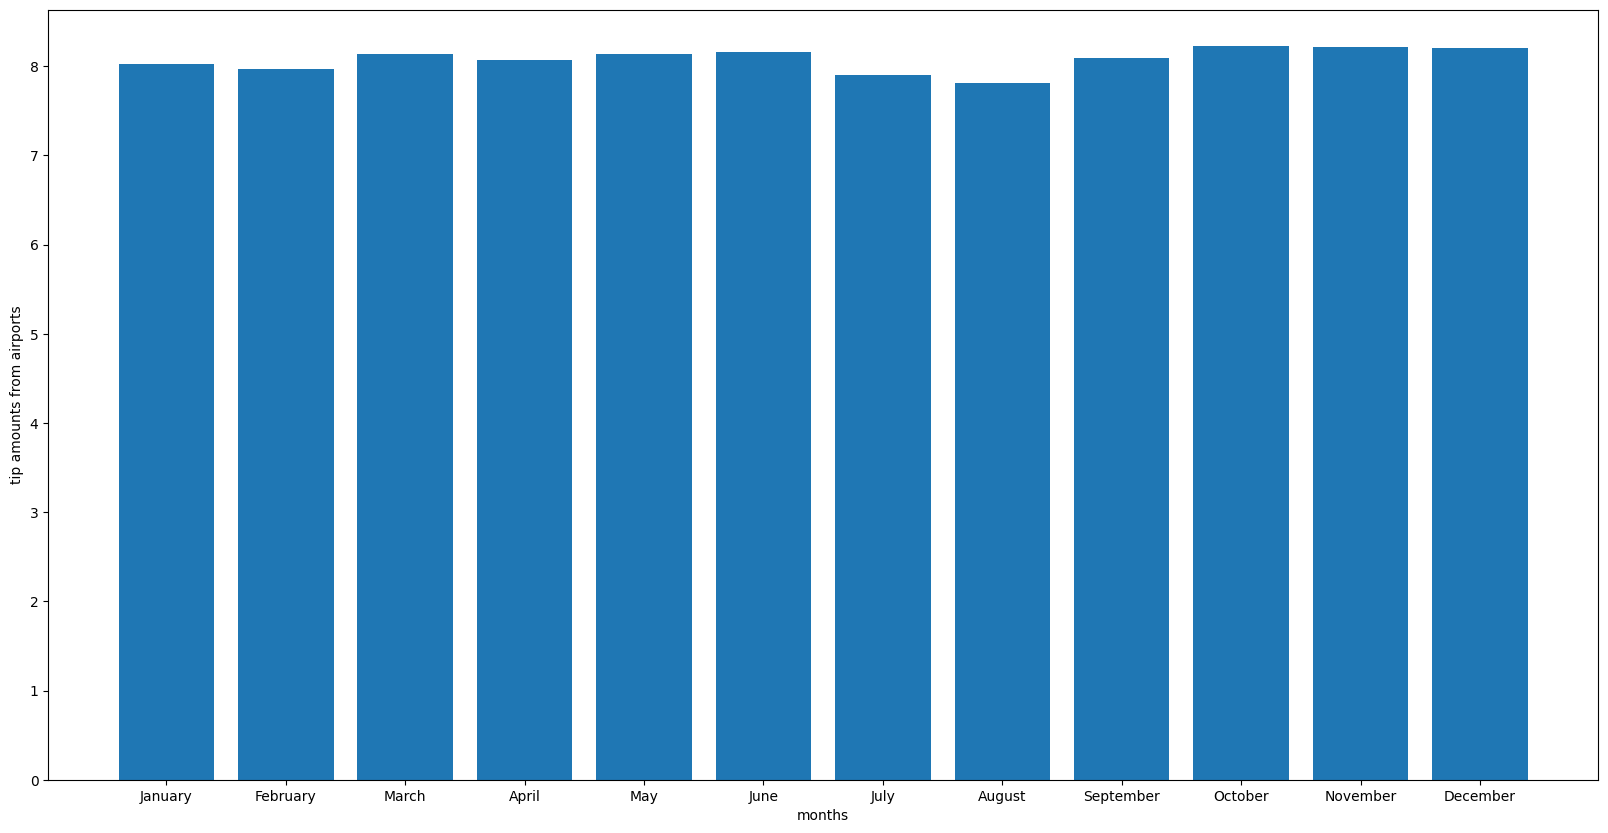

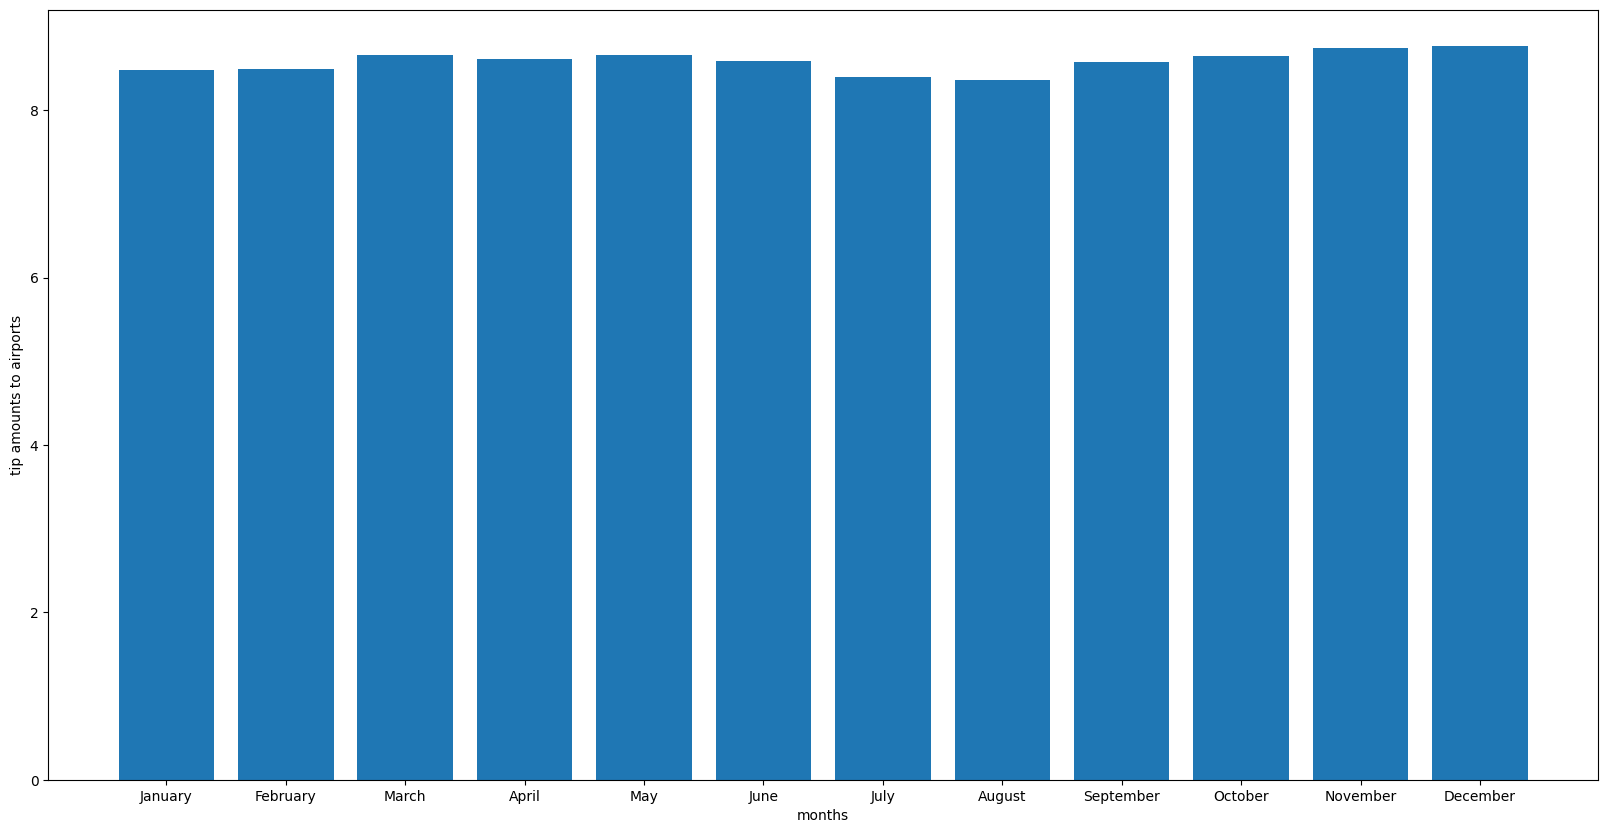

In [3]:
from_airport_tips, to_airport_tips = [], []

for month in setup.year:
    from_airport_tips.append(tips_at_airports(month, setup.airports, 0))
    to_airport_tips.append(tips_at_airports(month, setup.airports, 1))

average_from_airport_tips, average_to_airport_tips = setup.np.mean(from_airport_tips, axis=0), setup.np.mean(to_airport_tips, axis=0)
average_airport_tips = [average_from_airport_tips, average_to_airport_tips]

year_average_result(average_airport_tips, from_airport_tips, 0)
year_average_result(average_airport_tips, to_airport_tips, 1)

show_year_average(average_airport_tips)
show_directional_tips(from_airport_tips, 'tip amounts from airports')
show_directional_tips(to_airport_tips, 'tip amounts to airports')